# **Data Loading**

In [2]:
import pandas as pd

# Load the CSV file
csv_file_path = "hand_landmarks_data.csv"
df = pd.read_csv(csv_file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

(None,
            x1          y1            z1          x2          y2        z2  \
 0  262.669968  257.304901 -3.649205e-07  257.417542  247.109055  0.004224   
 1   83.351778  346.059113 -2.345265e-07   81.925037  328.562347 -0.011102   
 2  187.756977  260.235492 -2.417307e-07  195.460579  241.506035 -0.000184   
 3  114.976696  331.594238 -1.233261e-07  114.503494  320.549957 -0.002824   
 4  188.795288  141.727867 -1.622995e-07  188.520905  127.947464 -0.002884   
 
            x3          y3        z3          x4  ...         x19         y19  \
 0  246.882957  241.716827  0.005798  236.384537  ...  223.345093  255.490692   
 1   90.080132  311.535248 -0.021096   95.641823  ...  132.451618  341.794434   
 2  207.259529  223.674339 -0.009687  215.413628  ...  250.301010  268.602938   
 3  116.636627  310.080994 -0.008911  117.685066  ...  145.195450  329.357544   
 4  191.982880  111.010563 -0.008115  192.552521  ...  226.696396  132.263248   
 
         z19         x20         y2

# ***summary***

*   The dataset has 25,675 entries.
*   Each entry contains 63 float features (hand landmark coordinates: x, y, z for 21 keypoints).


*   There is one categorical column (label), representing the gesture class.
*   No missing values were found.











# **Data Cleaning**

In [3]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Check class distribution
class_distribution = df['label'].value_counts()

duplicate_count, class_distribution


(np.int64(0),
 label
 three2             1653
 palm               1649
 four               1634
 ok                 1592
 stop_inverted      1567
 call               1506
 peace_inverted     1497
 stop               1482
 rock               1458
 three              1456
 peace              1441
 like               1436
 two_up_inverted    1371
 two_up             1343
 dislike            1295
 one                1263
 mute               1087
 fist                945
 Name: count, dtype: int64)

# ***summary***



*   No duplicate rows found.
*   The dataset contains 18 gesture classes.

*   The number of samples per class is relatively balanced, but some classes have slightly fewer samples (fist, mute).










# **Data Preprocessing**

In [4]:
# Normalize (x, y) coordinates
df_normalized = df.copy()

# Get wrist coordinates (x1, y1)
wrist_x = df_normalized["x1"]
wrist_y = df_normalized["y1"]

# Get mid-finger tip coordinates (x9, y9)
mid_finger_x = df_normalized["x9"]
mid_finger_y = df_normalized["y9"]

# Normalize all x and y coordinates
for i in range(1, 22):
    df_normalized[f"x{i}"] = (df_normalized[f"x{i}"] - wrist_x) / (mid_finger_x - wrist_x)
    df_normalized[f"y{i}"] = (df_normalized[f"y{i}"] - wrist_y) / (mid_finger_y - wrist_y)

# Drop original z-coordinates since no additional processing is needed
df_normalized.drop(columns=[f"z{i}" for i in range(1, 22)], inplace=True)

# Display the first few rows after normalization
df_normalized.head()


,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y17,x18,y18,x19,y19,x20,y20,x21,y21,label
0,-0.0,0.0,0.152200,-3.311142,0.457461,-5.062289,0.761674,-5.147669,0.944458,-4.337861,...,3.495852,0.757965,-1.818208,1.139519,-0.589172,1.380078,0.263000,1.583989,0.748159,call
1,0.0,-0.0,-0.047299,0.697328,0.223055,1.375938,0.407434,1.881081,0.368598,2.341875,...,0.375079,1.090463,0.163856,1.627735,0.169967,1.969924,0.128725,2.290105,0.121283,call
2,0.0,-0.0,0.174026,1.218549,0.440568,2.378689,0.624771,3.331110,0.610297,4.139537,...,-0.277807,0.956545,-0.347988,1.412887,-0.544391,1.686774,-0.718343,1.925436,-0.783117,call
3,0.0,-0.0,-0.028004,0.600594,0.098236,1.169903,0.160283,1.616198,0.105928,1.991223,...,0.390802,1.213746,0.138351,1.788369,0.121633,2.135035,0.102339,2.427220,0.111231,call
4,0.0,-0.0,-0.012801,0.596641,0.148713,1.329946,0.175289,1.863481,-0.025927,2.222555,...,0.442715,1.134178,0.278597,1.768230,0.409783,2.147774,0.478152,2.462968,0.573706,call


# ***summary***
(x, y) coordinates are centered at the wrist (x1, y1).

Scaled based on the mid-finger tip (x9, y9).

Z-coordinates removed as they are not essential for 2D gesture classification.

# **Data Splitting**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels into numeric values
label_encoder = LabelEncoder()
df_normalized["label"] = label_encoder.fit_transform(df_normalized["label"])

# Split into features (X) and labels (y)
X = df_normalized.drop(columns=["label"])
y = df_normalized["label"]

# First, split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then, split temp into validation (15%) and test (15%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check dataset sizes
print(f"Train set: {X_train.shape}, Validation set: {X_valid.shape}, Test set: {X_test.shape}")



Train set: (17972, 42), Validation set: (3851, 42), Test set: (3852, 42)


# ***summary***

Encode the labels into numerical values.

Train Set (70%) → Used to train the model

Validation Set (15%) → Used to tune hyperparameters

Test Set (15%) → Used to evaluate final model performance

# **Visualization**

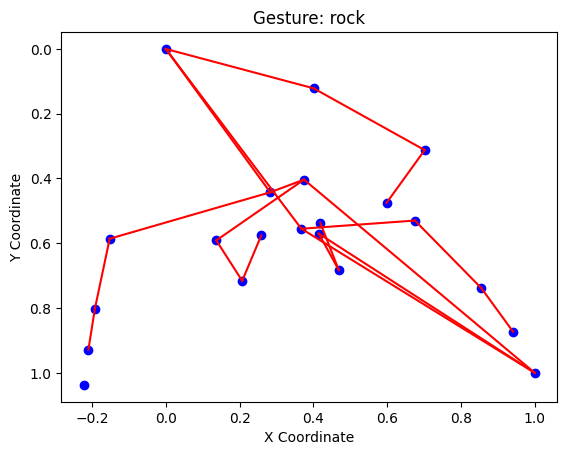

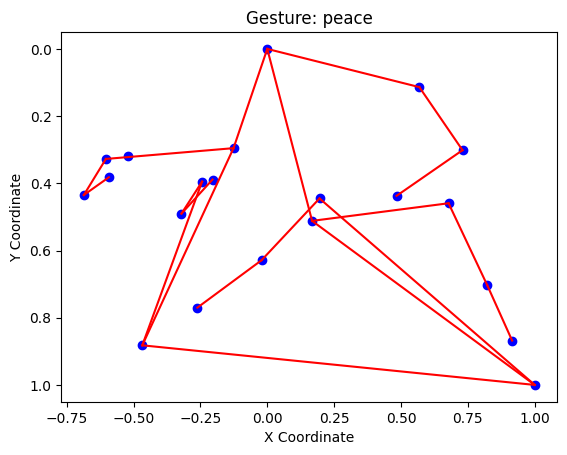

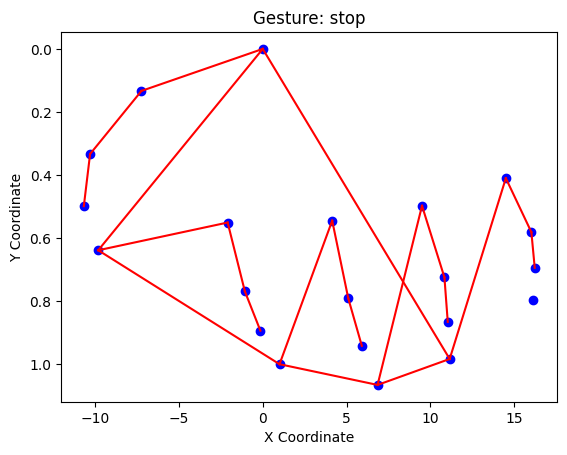

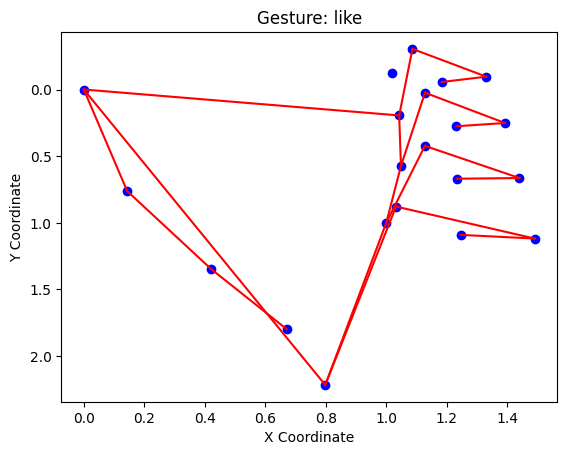

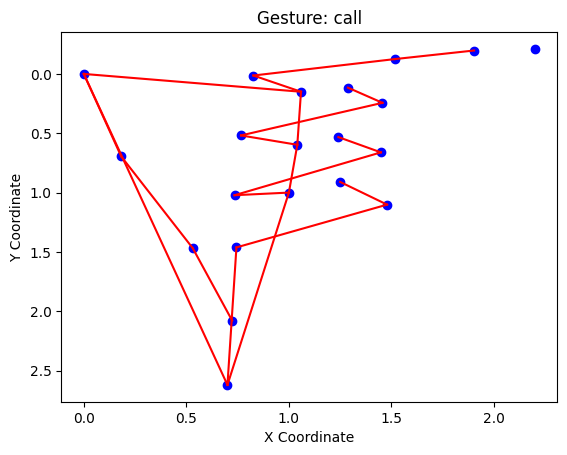

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot hand landmarks
def plot_hand_landmarks(sample, label):
    x_points = [sample[f"x{i}"] for i in range(1, 22)]
    y_points = [sample[f"y{i}"] for i in range(1, 22)]

    plt.scatter(x_points, y_points, color="blue")

    # Draw connections between keypoints
    connections = [
        (1, 2), (2, 3), (3, 4),  # Thumb
        (1, 5), (5, 6), (6, 7), (7, 8),  # Index
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring
        (13, 17), (17, 18), (18, 19), (19, 20),  # Pinky
        (1, 17)  # Palm connection
    ]

    for (i, j) in connections:
        plt.plot([x_points[i-1], x_points[j-1]], [y_points[i-1], y_points[j-1]], 'r-')

    plt.gca().invert_yaxis()  # Flip the y-axis for correct hand orientation
    plt.title(f"Gesture: {label}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

# Pick a few random samples from different classes
samples = df_normalized.sample(n=5, random_state=42)
for _, row in samples.iterrows():
    plot_hand_landmarks(row, label_encoder.inverse_transform([int(row["label"])])[0])




# **Model Training**

In [7]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel="rbf", probability=True, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train models
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
adaboost.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_adaboost = adaboost.predict(X_test)

# Evaluate models
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

print("AdaBoost Performance:")
print(classification_report(y_test, y_pred_adaboost))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       226
           1       0.98      0.95      0.97       194
           2       0.99      0.99      0.99       141
           3       0.98      0.98      0.98       245
           4       0.95      0.98      0.96       216
           5       0.95      0.97      0.96       163
           6       1.00      0.99      0.99       239
           7       0.97      0.95      0.96       189
           8       0.98      0.98      0.98       248
           9       0.99      0.94      0.96       216
          10       0.97      0.97      0.97       225
          11       1.00      1.00      1.00       219
          12       0.93      0.96      0.94       223
          13       0.94      0.96      0.95       235
          14       1.00      0.97      0.98       219
          15       0.99      1.00      0.99       248
          16       0.97      0.99      0.98       201


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# ***summary***

I trained and evaluated three machine learning models (Random Forest, SVM, and AdaBoost)



1- Random Forest (Best Performer)

Accuracy: 97% (Highest among all models).

High precision, recall, and F1-score for all classes.

Handles all gestures well with minimal misclassifications.



2- SVM  (Failed Model)

Accuracy: 6% (Completely unusable).

Failed to classify most gestures , only one class was correctly predicted.



3- AdaBoost (Mediocre Performance)

Accuracy: 43% (Better than SVM but far below Random Forest).

Some classes were classified well, others were completely ignored.

Possible improvements: Adjust base estimator, increase estimators, tune hyperparameters.

# ***Conclusion:***

Selecting the Best Model
After comparing all models, Random Forest is the best-performing model with 97% accuracy, strong precision, recall, and F1-score. It outperforms both SVM (6%) and AdaBoost (43%), making it the most reliable choice for hand gesture classification.

# **Final Decision:Random Forest as the best model.**

In [9]:
import pickle

# Save the model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


In [12]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [41]:
import cv2
import mediapipe as mp
import numpy as np
import pickle

# Load the trained model (Random Forest)
model = pickle.load(open('random_forest_model.pkl', 'rb'))


class_names = [
    'three2', 'palm', 'four', 'ok', 'stop_inverted', 'like', 'peace_inverted',
    'stop', 'rock', 'three', 'peace', 'call', 'two_up_inverted', 'two_up',
    'dislike', 'one', 'mute', 'fist'
]


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=1,
                       min_detection_confidence=0.5,
                       min_tracking_confidence=0.5)

# Input video
video_path = "g9.mp4"
cap = cv2.VideoCapture(video_path)

# Output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('gesture_output.mp4', fourcc, 20.0,
                      (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break


    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Extract 21 landmark points: x, y
            landmarks = []
            for lm in hand_landmarks.landmark:
                landmarks.extend([lm.x, lm.y])
            landmarks = np.array(landmarks).reshape(1, -1)

            # Make prediction and get class name
            predicted_class_index = model.predict(landmarks)[0]
            predicted_class_name = class_names[predicted_class_index]

            # Draw landmarks and prediction
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.putText(frame, f'Gesture: {predicted_class_name}', (10, 40),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()
print("Video saved as gesture_output.mp4")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

Video saved as gesture_output.mp4


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
from google.colab import files
files.download("gesture_output.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>